3187
p=1 RMSE:8.496
p=2 RMSE:14.330
p=3 RMSE:18.239
p=4 RMSE:20.985
p=5 RMSE:23.058
p=6 RMSE:25.081
p=7 RMSE:26.986
p=8 RMSE:28.716
p=9 RMSE:30.342
p=10 RMSE:31.887
p=11 RMSE:33.053
p=12 RMSE:33.390
p=13 RMSE:32.109
p=14 RMSE:30.818
p=15 RMSE:29.137
p=16 RMSE:27.732
p=17 RMSE:26.161
p=18 RMSE:24.224
p=19 RMSE:21.589
p=20 RMSE:19.421
p=21 RMSE:16.749
p=22 RMSE:12.472
p=23 RMSE:8.378
p=24 RMSE:2.665
p=25 RMSE:9.060
p=26 RMSE:15.016
p=27 RMSE:19.099
p=28 RMSE:21.974
p=29 RMSE:24.239
p=30 RMSE:26.421
p=31 RMSE:28.594
p=32 RMSE:30.666
p=33 RMSE:32.506
p=34 RMSE:34.327
p=35 RMSE:35.938
p=36 RMSE:36.453
p=37 RMSE:35.301
p=38 RMSE:34.028
p=39 RMSE:32.460
p=40 RMSE:31.046
p=41 RMSE:28.988
p=42 RMSE:26.790
p=43 RMSE:24.608
p=44 RMSE:22.487
p=45 RMSE:19.281
p=46 RMSE:14.242
p=47 RMSE:8.858
p=48 RMSE:5.703
p=49 RMSE:8.781


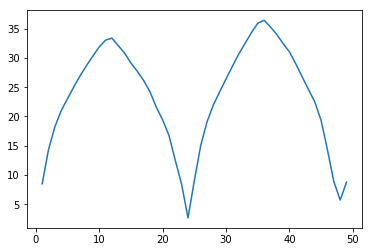

In [1]:
# using RMSE to calculate the hours used to predict the future
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('N_cur_2017_01_05.csv', header=0)
# prepare data
X = series.values
print(len(X))
train, test = X[0:-24], X[-24:-1]
persistence_values = range(1, 50)
scores = list()
for p in persistence_values:
    # walk-forward validation
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        # make prediction
        yhat = history[-p]
        predictions.append(yhat)
        # observation
        history.append(test[i])
    # report performance
    rmse = sqrt(mean_squared_error(test, predictions))
    scores.append(rmse)
    print('p=%d RMSE:%.3f' % (p, rmse))
# plot scores over persistence values
pyplot.plot(persistence_values, scores)
pyplot.show()

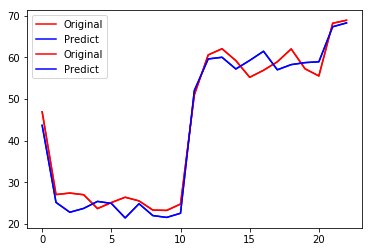

In [3]:
# using the data of the first 24 hours to predict the later 24 hours
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
# load data
series = Series.from_csv('N_cur_2017_01_05.csv', header=0)
# prepare data
X = series.values
train, test = X[0:-24], X[-24:-1]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    yhat = history[-24]
    predictions.append(yhat)
    # observation
    history.append(test[i])
# plot predictions vs observations
pyplot.plot(test, color='red', label='Original')
pyplot.plot(predictions, color='blue',label='Predict')
plt.legend(loc='best')
pyplot.show()